# Import all required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


# Load train and test data

## Load the train data and rapid check

In [2]:
train = pd.read_csv("./input/train.csv")
print(train.shape)
print(train.head())
train.info()

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

## Load the test data and rapid check

In [3]:
test = pd.read_csv("./input/test.csv")
print(test.shape)
print(test.head())
test.info()

(28000, 784)
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0

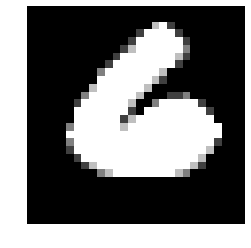

In [4]:
some_digit = train.iloc[500, 1:].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image,
           cmap=plt.get_cmap('gray'))
plt.axis("off")
plt.show()

# # create train/test split from train dataset

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train,
                                       test_size=0.2, random_state=42)

X_train = train_set.iloc[:, 1:]
y_train = train_set.iloc[:, 0]
X_test = test_set.iloc[:, 1:]
y_test = test_set.iloc[:, 0]


# Training a binary classifier

## Setting criteria and initiate classifier

In [6]:
from sklearn.linear_model import SGDClassifier

# Implementing criteria
# Either 6 or not
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

# Initiate classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Make prediction

In [7]:
sgd_clf.predict([some_digit])

array([ True])

## Measure performance

### Cross validation and accuracy

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_6, cv=8, scoring='accuracy')

array([0.98190476, 0.97571429, 0.98261905, 0.98261905, 0.97785714,
       0.97928571, 0.98404762, 0.97619048])

### Confusion matrix, precision and recall

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=8)

print(confusion_matrix(y_train_6, y_train_pred))
print(precision_score(y_train_6, y_train_pred))
print(recall_score(y_train_6, y_train_pred))

[[29973   275]
 [  396  2956]]
0.9148870318786754
0.8818615751789977


The 6-detector is correct when it claimsan image represents a 6 only 91% of the time.
It only detects 88% of the 6s.

Now let's combine precision and recall into the F1 score.
The F1 score is the harmonic mean of precision and recall.

In [10]:
from sklearn.metrics import f1_score

f1_score(y_train_6, y_train_pred)

0.8980707883943492

### Decide threshold

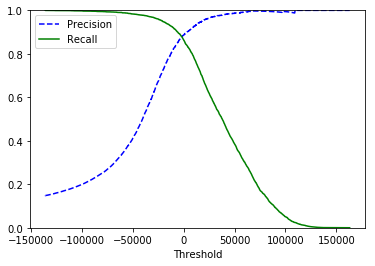

In [14]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [17]:
y_train_pred_90 = (y_scores > 70000)

print(precision_score(y_train_6, y_train_pred_90))
print(recall_score(y_train_6, y_train_pred_90))

0.9972260748959778
0.21449880668257756


There is a precision of 99% but a 21% recall.

## ROC Curve

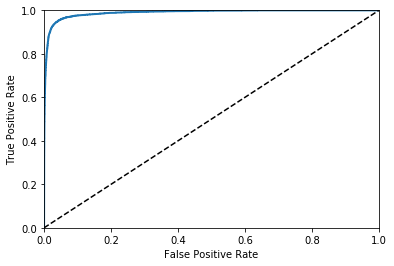

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

The higher the recall (TPR), the more false positive (FPR) the classifier produces.

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_6, y_scores)

0.9889037023454165

## Training Random Forest Classifier

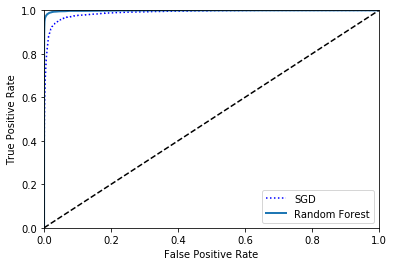

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_6,
                                 cv=8, method='predict_proba')

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_6, y_scores_forest) 

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [28]:
roc_auc_score(y_train_6, y_scores_forest)

y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=8)

print(precision_score(y_train_6, y_train_pred_forest))
print(recall_score(y_train_6, y_train_pred_forest))
f1_score(y_train_6, y_train_pred_forest)

0.9905153335441037
0.9346658711217184


0.9617805065234075